<a href="https://colab.research.google.com/github/Amisha2778/Nasa-Nearest-Earth-Objects/blob/main/PYTHON_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PYTHON SECOND SEMESTER PROJECT**

## TEAM MEMBERS

* ### DIYA KHAJURIA, 05001182021, ECE-AI
* ### AMISHA SHARMA, 05301182021, ECE-AI

### DATASET: NASA - Nearest Earth Objects
### KAGGLE LINK: https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects

## DATASET DESCRIPTION:
* **id:** Unique Identifier for each Asteroid
* **Name:**given by NASA
* **est_diameter_min:** Minimum Estimated Diameter in Kilometres
* **est_diameter_max:** Maximum Estimated Diameter in Kilometres
* **relative_velocity:** Velocity Relative to Earth
* **miss_distance:** Distance in Kilometres missed
* **orbiting_body:** Planet that the asteroid orbits
* **sentry_object:** Included in sentry - an automated collision monitoring system
* **absolute_magnitude:** Describes intrinsic luminosity
* **hazardous:** Boolean feature that shows whether asteroid is harmful or not

##OBJECTIVE: 
* To clean the data: Removing irrelevant columns/rows, dealing with null values
* To visualize the chosen dataset using appropriate plots with the help of seaborn and matplotlib
* Training three machine learning algorithms using sklearn
* Performing Prediction on the test dataset using the trained models

### DATA CLEANING

In [ ]:

#Importing important libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [ ]:
df=pd.read_csv('neo_v2.csv')

In [ ]:
# First Five rows of the data
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [ ]:
# Last Five rows of the data
df.tail() 

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [ ]:
#Summary statistics
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [ ]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [ ]:
df.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,NaN,0.277258,-0.123443
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,NaN,-0.353863,0.191185
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,NaN,-0.264168,0.042302
sentry_object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,NaN,1.000000,-0.365267
hazardous,-0.123443,0.183363,0.183363,0.191185,0.042302,NaN,-0.365267,1.000000


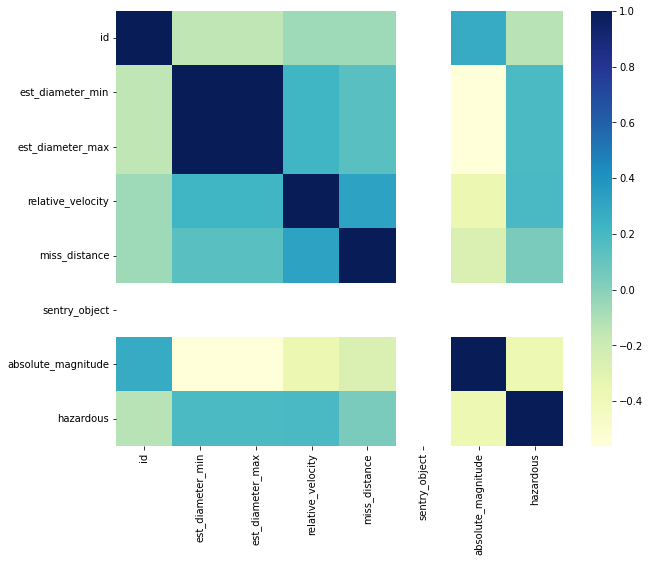

In [ ]:
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

In [ ]:
# Based on observations from the heatmap
# Dropping columns Sentry_object and Orbiting_body
# Reason for this is that every entry is Sentry_object is given as False and every entry in orbiting_body is given as Earth
# So it makes sense into dropping these variables
df.drop(columns=['sentry_object','orbiting_body'],inplace=True)
# We set inplace = True we are saying that we want the output of our modified data frame to essentially override the original data frame.

##UNIVARIATE ANALYSIS

The term univariate analysis refers to the analysis of one variable. The prefix “uni” means “one.”

The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [ ]:
df.select_dtypes(include=np.number).drop(columns='id').columns       

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'],
      dtype='object')

In [ ]:
nums=['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'] # Numerical columns

plt.rcParams is a matplotlib.RcParams object, it is a dictionary-like variable which store some rc settings in matplotlib. 

matplotlib.rcParams contains some properties in matplotlibrc file. We can use it to control the defaults of almost every property in Matplotlib: figure size and DPI, line width, color and style, axes, axis and grid properties, text and font properties and so on.

A Dispersion Plot, also known as a Distplot, displays the variance in the original dataset. The total dispersion of a real-time data parameters is shown by the distplot() function of the Seaborn framework. The Seaborn library, in conjunction with the Matplotlib library, is applied to visualize the distplot among the several modifications. The data is represented by using a histogram as well as a curve in the Distplot.

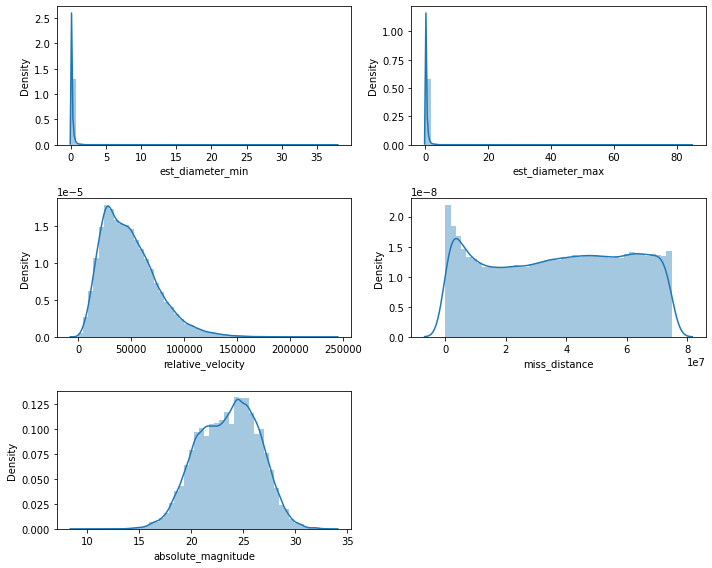

In [ ]:
# Making multiple subplots
rows=3
cols=2
counter=1
plt.rcParams['figure.figsize']=[10,8]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.distplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

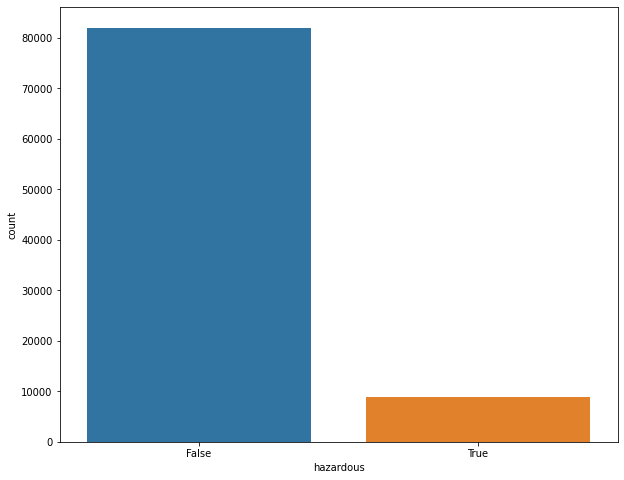

In [ ]:
sns.countplot(x='hazardous',data=df)
plt.show()

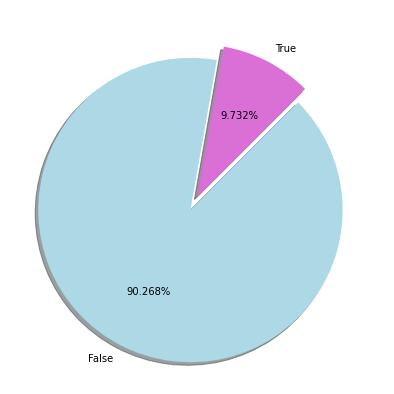

In [ ]:
fig = plt.figure(figsize=(7,7)) #width and height
colours = ["orchid", "lightblue"]
Hazardous = df[df['hazardous']== True]
Non_Hazardous = df[df['hazardous']== False]
Hazard_ratio = [Hazardous['hazardous'].count(),Non_Hazardous['hazardous'].count()] # To count False and True rows in column-'hazardous'
senti_Pie = plt.pie(Hazard_ratio, #to plot pie chart
                 labels= ['True', 'False'], 
                 autopct ='%.3f%%', 
                 shadow = True,
                 colors=colours,
                 startangle = 45,
                 explode=(0, 0.1))

### Inferences From the subplots
* Estimated minimum Diameter and estimated maximum Diameter are highly positively skewed with sharp spike at on end, indicating the presence of outliers
* Relative Velocity is mildly positive skewed
* miss_distance is uniform over the data
* Absolute magnitude is the closest one to a normal distribution curve
* There are a lot more non-hazardous object than hazardous

##Bivariate Analysis

The term bivariate analysis refers to the analysis of two variables.The prefix “bi” means “two.”

The purpose of bivariate analysis is to understand the relationship between two variables.

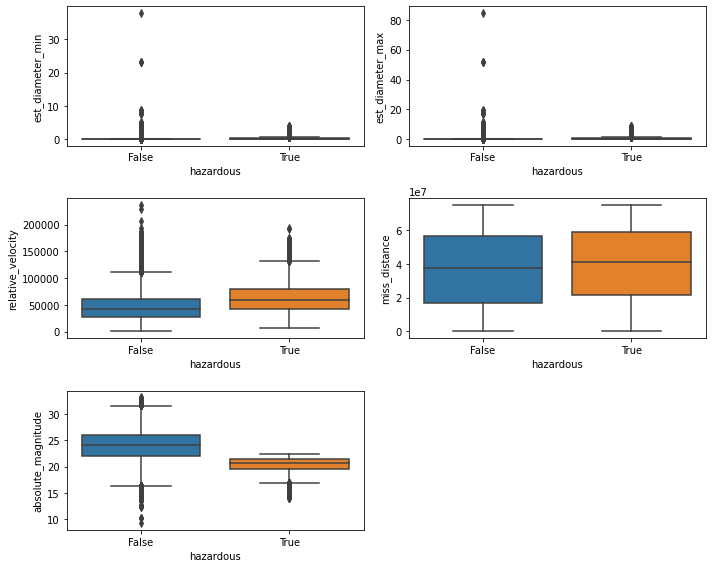

In [ ]:
# Making subplots for multiple boxplots and comparing with our target variable

rows=3
cols=2
counter=1
plt.rcParams['figure.figsize']=[10,8]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.boxplot(x='hazardous',y=i,data=df)
    counter+=1
    
plt.tight_layout()
plt.show()

### Inference from the boxplots:
* Non-Hazardous objects have a higher estimated minimum and maximum diameter
* Our Hypothesis is that Hazardous objects have a higher relative_velocity
* It seems that hazardous objects have a slightly higher miss_distance
* The graphs indicate that Non-Hazardous objects have considerably higher absolute_magnitude.

[Text(0, 0, 'id'),
 Text(0, 0, 'est_diameter_min'),
 Text(0, 0, 'est_diameter_max'),
 Text(0, 0, 'relative_velocity'),
 Text(0, 0, 'miss_distance'),
 Text(0, 0, 'absolute_magnitude'),
 Text(0, 0, 'hazardous')]

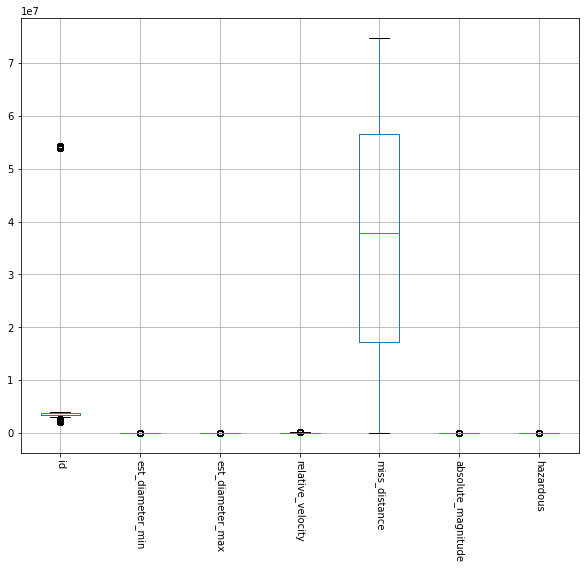

In [ ]:
ax =df.boxplot()
ax.set_xticklabels(ax.get_xticklabels(), rotation=270)

In [ ]:
q1 = df['relative_velocity'].quantile(0.25)
q3 = df['relative_velocity'].quantile(0.75)
iqr = q3 - q1
print(q1,q3,iqr)

28619.02064490995 62923.60463276395 34304.583987854


In [ ]:
lower_outlier = df.relative_velocity<(q1 - 1.5 * iqr)
upper_outlier = df.relative_velocity<(q3 - 1.5 * iqr)
df[lower_outlier | upper_outlier]

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
14,2198752,198752 (2005 EA60),0.290105,0.648694,10402.002178,6.078930e+07,19.81,False
56,3557536,(2011 CL50),0.009216,0.020608,10942.402085,2.730964e+06,27.30,False
61,3172329,(2004 BK11),0.088015,0.196807,10141.457346,5.074799e+07,22.40,False
201,54254975,(2022 EL5),0.010059,0.022493,9941.597612,9.335864e+06,27.11,False
246,3683393,(2014 QN266),0.014607,0.032662,7780.340113,1.601325e+07,26.30,False
...,...,...,...,...,...,...,...,...
90667,54204652,(2021 TT4),0.006289,0.014062,9892.841997,1.932855e+07,28.13,False
90683,54016473,(2020 GO1),0.008027,0.017949,10425.464898,7.161346e+07,27.60,False
90766,54017542,(2020 LE2),0.096506,0.215794,10282.516060,6.471979e+07,22.20,False
90795,54248340,(2022 DJ1),0.008139,0.018199,8119.172071,2.591168e+07,27.57,False


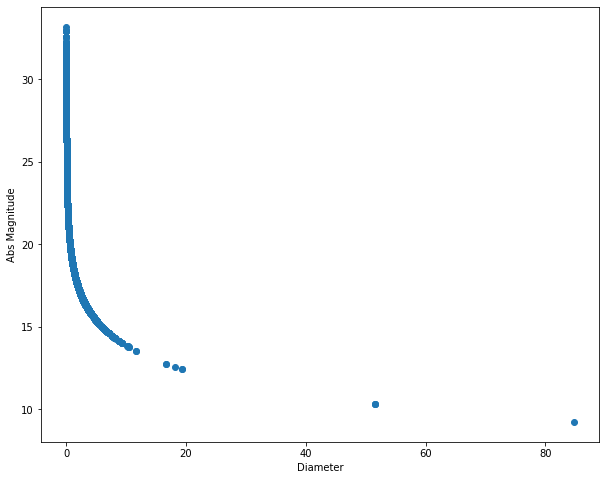

In [ ]:
plt.scatter(df.est_diameter_max,df.absolute_magnitude)
plt.xlabel('Diameter')
plt.ylabel('Abs Magnitude')
plt.show()

In [ ]:
# Extracting year from name to see later on whether we could have a pattern
df[['drop','work']]=df.name.str.split('(',expand=True)

In [ ]:
# Dropping the unnecessary extra column we made
df.drop(columns='drop',inplace=True)

In [ ]:
def year_extract(x):
    return x.strip()[0:x.strip().index(' ')]
df['year']=df['work'].apply(year_extract)

In [ ]:
df['year'].unique()

array(['2000', '2005', '2015', '2012', '2014', '2021', '2001', '2016',
       '2020', '2022', '2017', '2018', '2019', '2003', '2006', '2013',
       '1994', '1998', '1978', '1984', '1980', '2007', '2009', '2011',
       '1991', '2004', '2002', '2010', '1990', '2008', '1999', '1993',
       '1997', '1995', '1951', '1950', '1996', '1986', '1992', '1987',
       '1971', '1989', '1960', '1982', '1953', 'A911', '1976', '1973',
       '1936', '1988', '1977', '1937', '1985', '1948', '6743', '1983',
       'A898', '1949', '1974', '1932', '1972', '4788', '6344', '1968',
       '1981', '1979', 'A924', '1947', '1959', '1975', '1929', 'A/2019',
       '1963'], dtype=object)

In [ ]:
# [A911,6743,A898,4788,6344,A924,A/2019] --> Years to be changed 

In [ ]:
df.loc[df.year=='A911','year']='1911' 
df.loc[df.year=='6743','year']='1960'
df.loc[df.year=='A898','year']='1898'
df.loc[df.year=='6344','year']='1960'
df.loc[df.year=='A924','year']='1924'
df.loc[df.year=='A/2019','year']='2019'
df.loc[df.year=='4788','year']='1960'

In [ ]:
df.year.unique()

array(['2000', '2005', '2015', '2012', '2014', '2021', '2001', '2016',
       '2020', '2022', '2017', '2018', '2019', '2003', '2006', '2013',
       '1994', '1998', '1978', '1984', '1980', '2007', '2009', '2011',
       '1991', '2004', '2002', '2010', '1990', '2008', '1999', '1993',
       '1997', '1995', '1951', '1950', '1996', '1986', '1992', '1987',
       '1971', '1989', '1960', '1982', '1953', '1911', '1976', '1973',
       '1936', '1988', '1977', '1937', '1985', '1948', '1983', '1898',
       '1949', '1974', '1932', '1972', '1968', '1981', '1979', '1924',
       '1947', '1959', '1975', '1929', '1963'], dtype=object)

In [ ]:
df.year=df.year.astype(int) # Converting into int to check distribution

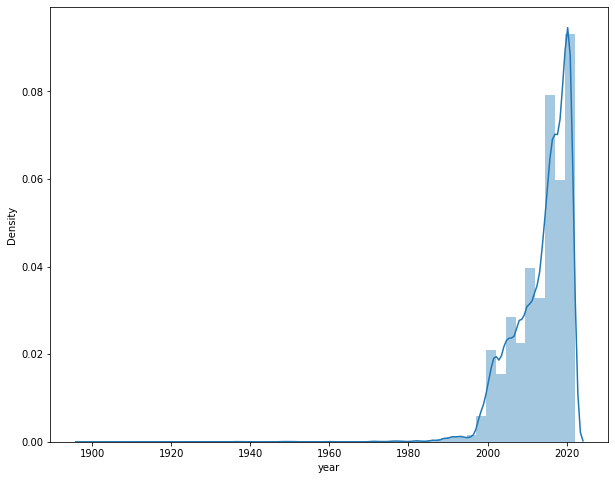

In [ ]:
sns.distplot(df.year)
plt.show()

In [ ]:
# Dropping the extra column we made
df.drop(columns=['work'],inplace=True)

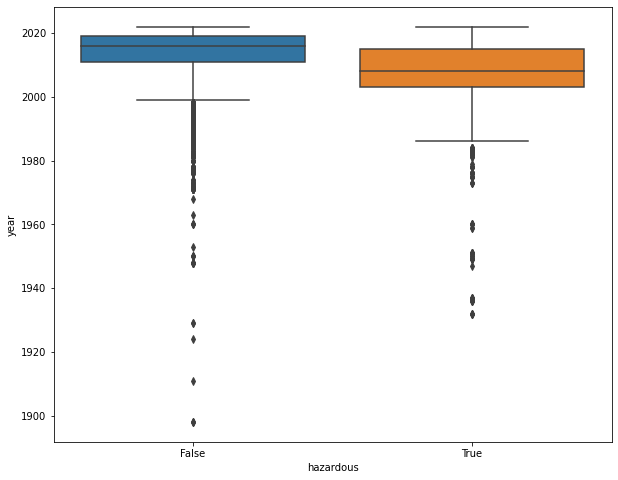

In [ ]:
sns.boxplot(x='hazardous',y='year',data=df)
plt.show()

###Inference from the boxplot
* Hazardous objects were mostly discovered between around 2002 to before 2020
* There were many non-hazardous objects discovered pre-1980s

###MULTIVARIATE ANALYSIS


MULTIPLE BIVARIATE ANALYSIS

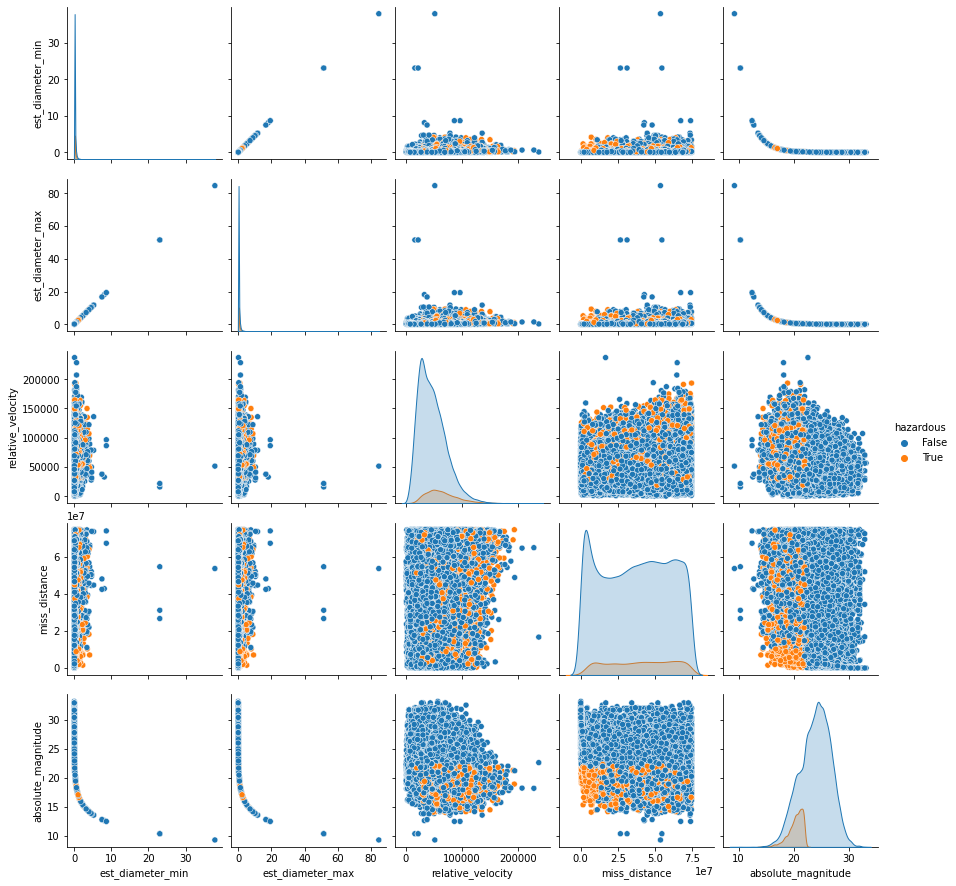

In [ ]:
sns.pairplot(df[nums+['hazardous']],hue='hazardous')

## Feature Engineering

In [ ]:
# Dropping more unnecessary columns as they have no effect on hazardous
df.drop(columns=['id','name'],inplace=True)

In [ ]:
# Replacing True with 1 and false with 0 in hazardous
df['hazardous'].replace(to_replace=[True,False],value=[1,0],inplace=True)

In [ ]:
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,year
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0,2000
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1,2005
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0,2015
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0,2012
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1,2014


In [ ]:
#Checking co-relation
df.corr()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,year
est_diameter_min,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,-0.468348
est_diameter_max,1.000000,1.000000,0.221553,0.142241,-0.560188,0.183363,-0.468348
relative_velocity,0.221553,0.221553,1.000000,0.327169,-0.353863,0.191185,-0.128262
miss_distance,0.142241,0.142241,0.327169,1.000000,-0.264168,0.042302,-0.101514
absolute_magnitude,-0.560188,-0.560188,-0.353863,-0.264168,1.000000,-0.365267,0.517477
hazardous,0.183363,0.183363,0.191185,0.042302,-0.365267,1.000000,-0.269807
year,-0.468348,-0.468348,-0.128262,-0.101514,0.517477,-0.269807,1.000000


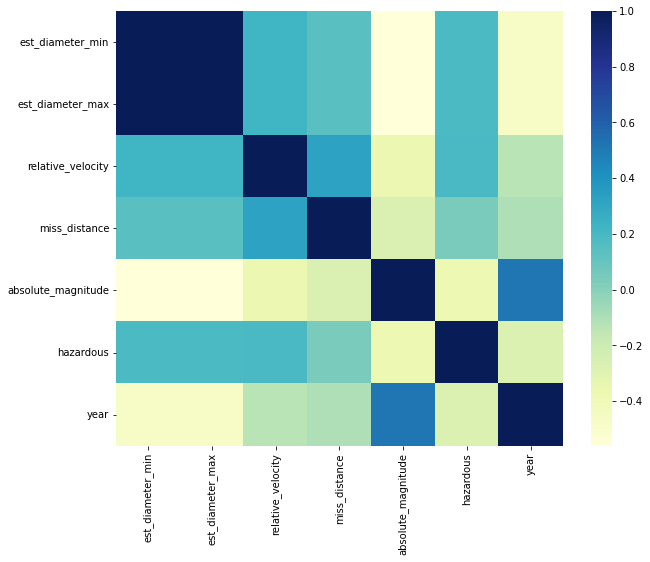

In [ ]:
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

In [ ]:
# dropping year column as it has no effect on hazardous
df.drop(columns='year',inplace=True)

## Splitting and Scaling of the data

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
X = df.drop(columns='hazardous')
Y=df.loc[:,'hazardous']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,train_size=0.75)

In [ ]:
X_train

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
1547,0.038420,0.085909,21269.330326,4.018554e+07,24.20
43985,0.013949,0.031192,21503.525125,8.959865e+06,26.40
63738,0.025384,0.056760,51833.004694,5.643930e+07,25.10
79744,0.012605,0.028186,65603.509021,7.124748e+07,26.62
57743,0.008405,0.018795,25333.155600,3.082989e+06,27.50
...,...,...,...,...,...
21243,0.201630,0.450858,17549.716365,3.262428e+07,20.60
45891,0.013949,0.031192,13242.895823,9.609093e+06,26.40
42613,0.023150,0.051765,54783.899522,5.938720e+07,25.30
43567,0.080641,0.180318,49596.063270,3.801685e+07,22.59


In [ ]:
# Pre-processing: Normalization / Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() # Machine Instance
train_scaled=pd.DataFrame(sc.fit_transform(X_train)) # Scaling the train set
test_scaled=pd.DataFrame(sc.transform(X_test)) # Scaling the test set

## **Decision Tree Classifier**

### Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
# Importing Decision Tree Classifier for predictions and accuracy_score to check accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [ ]:
model=DecisionTreeClassifier() # Machine Instance
model.fit(train_scaled,Y_train) # Traning the model

dt_predictions_train=model.predict(train_scaled) # Predicting for train set
dt_acc_train=accuracy_score(Y_train,dt_predictions_train) # Calculating accuracy


dt_predictions_test=model.predict(test_scaled) # Predicting on test set
dt_acc_test=accuracy_score(Y_test,dt_predictions_test) # Calculating accuracy

In [ ]:
print('Accuracy of predictions on train data:',round(dt_acc_train*100,2),'%')
print('Accuracy of predictions on test data:',round(dt_acc_test*100,2),'%')

Accuracy of predictions on train data: 100.0 %
Accuracy of predictions on test data: 89.48 %


In [ ]:
print(classification_report(Y_test,dt_predictions_test ))
cf_matrix_1 = confusion_matrix(Y_test,dt_predictions_test)
print(cf_matrix_1)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     20483
           1       0.46      0.47      0.47      2226

    accuracy                           0.89     22709
   macro avg       0.70      0.70      0.70     22709
weighted avg       0.90      0.89      0.89     22709

[[19280  1203]
 [ 1187  1039]]


* 19299 + 1041 = CORRECT PREDICTIONS
* 1185 + 1184= INCORRECT PREDICTIONS

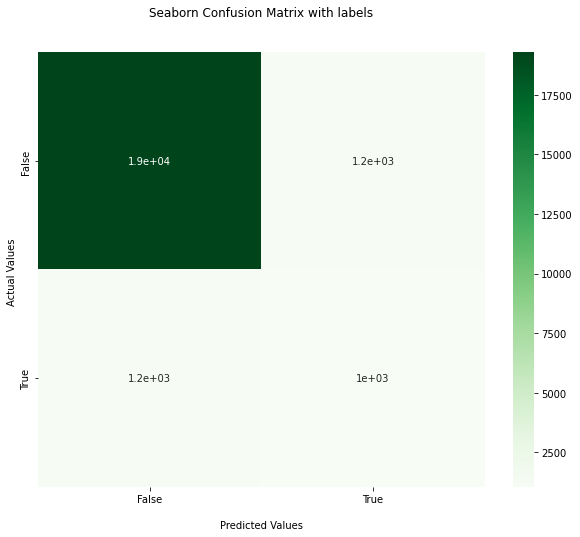

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix_1, annot=True, cmap='Greens')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## **Logistic Regression**

### This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In [ ]:
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression model

model_lr=LogisticRegression() # Machine Instance
model_lr.fit(train_scaled,Y_train)# Training the model

# Predictions made
LR_predict_train=model_lr.predict(train_scaled)
LR_predict_test=model_lr.predict(test_scaled)

# Accuracy Calculation
LR_acc_train=accuracy_score(LR_predict_train,Y_train)
LR_acc_test=accuracy_score(LR_predict_test,Y_test)


In [ ]:
print('Accuracy of predictions on Train set:',round(LR_acc_train*100,2),'%')
print('Accuracy of predictions on Test set:',round(LR_acc_test*100,2),'%')

Accuracy of predictions on Train set: 90.21 %
Accuracy of predictions on Test set: 90.25 %


In [ ]:
print(classification_report(Y_test,LR_predict_test ))
cf_matrix_2 = confusion_matrix(Y_test,LR_predict_test)
print(cf_matrix_2)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     20483
           1       0.52      0.08      0.13      2226

    accuracy                           0.90     22709
   macro avg       0.71      0.53      0.54     22709
weighted avg       0.87      0.90      0.87     22709

[[20326   157]
 [ 2058   168]]


* 20326 + 157 = CORRECT PREDICTIONS
* 2058 + 168 = INCORRECT PREDICTIONS

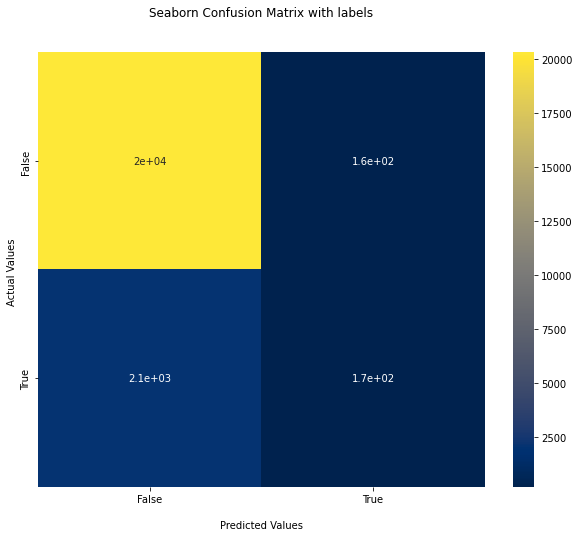

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix_2, annot=True, cmap='cividis')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## **Random forest Classifier**

###Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier() # Machine Instance
model_rf.fit(train_scaled,Y_train)# Training the model

# Predictions made
Rf_predict_train=model_rf.predict(train_scaled)
Rf_predict_test=model_rf.predict(test_scaled)

# accuracy calculation
Rf_acc_train=accuracy_score(Rf_predict_train,Y_train)
Rf_acc_test=accuracy_score(Rf_predict_test,Y_test)

In [ ]:
print('Accuracy of predictions on Train set:',round(Rf_acc_train*100,2),'%')
print('Accuracy of predictions on Test set:',round(Rf_acc_test*100,2),'%')

Accuracy of predictions on Train set: 100.0 %
Accuracy of predictions on Test set: 91.99 %


In [ ]:
print(classification_report(Y_test,Rf_predict_test ))
cf_matrix_3 = confusion_matrix(Y_test,Rf_predict_test)
print(cf_matrix_3)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     20483
           1       0.64      0.42      0.51      2226

    accuracy                           0.92     22709
   macro avg       0.79      0.70      0.73     22709
weighted avg       0.91      0.92      0.91     22709

[[19959   524]
 [ 1294   932]]


* 19934 + 949 = CORRECT PREDICTIONS
* 549 + 1277= INCORRECT PREDICTIONS

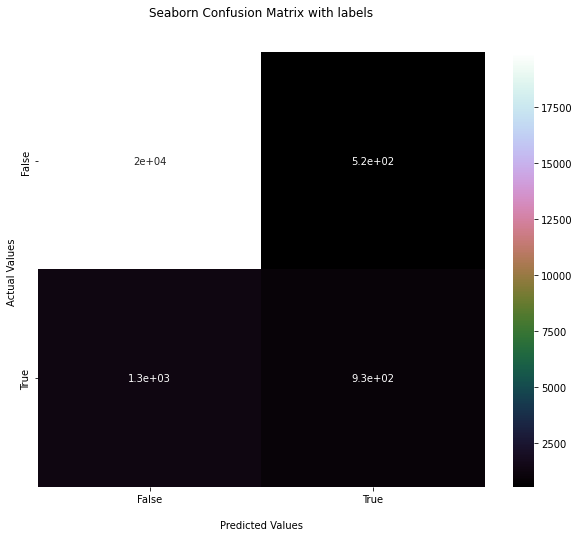

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix_3, annot=True, cmap='cubehelix')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### **GENERATION OF DATAFRAME FOR RELEVANT PARAMETER RESULT OBTAINED**

In [ ]:
# Dataframe for train accuracies of respective models
train_acc_df = pd.DataFrame({
                          'dtc_acc':[dt_acc_train],     
                          'LR_acc':[LR_acc_train],
                          'Rf_acc':[Rf_acc_train]})

In [ ]:
# Dataframe for test accuracies of respective models
test_acc_df = pd.DataFrame({
                          'dtc_acc':[dt_acc_test],
                          'LR_acc':[LR_acc_test],
                          'Rf_acc':[Rf_acc_test]})

In [ ]:
train_acc_df

,dtc_acc,LR_acc,Rf_acc
0,1.0,0.902065,0.999985


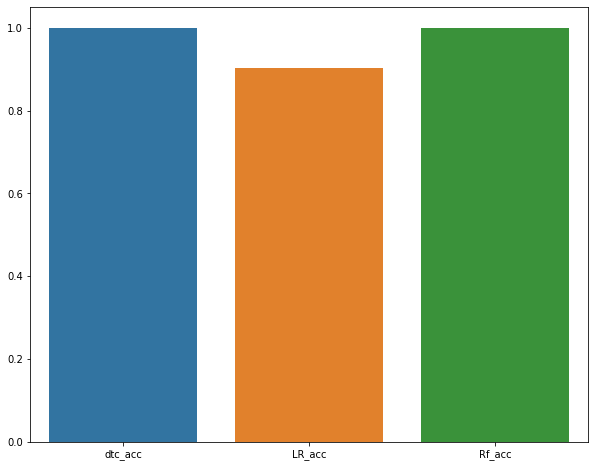

In [ ]:
sns.barplot(data=train_acc_df)

In [ ]:
test_acc_df

,dtc_acc,LR_acc,Rf_acc
0,0.894755,0.902462,0.919944


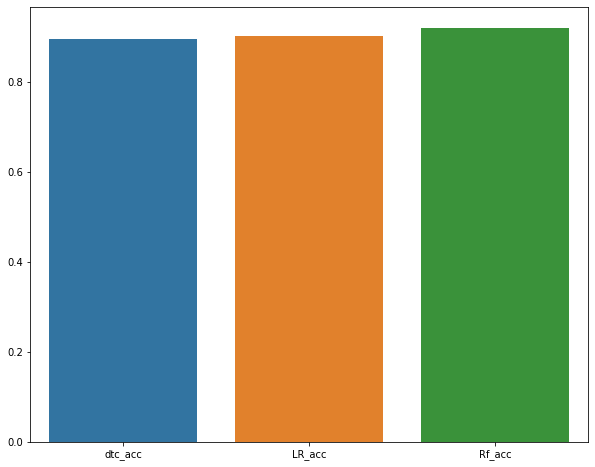

In [ ]:
sns.barplot(data=test_acc_df)

## QUESTION: DIFFERENCE BETWEEN DECESION TREE CLASSIFIER AND RANDOM FOREST CLASSIFIER

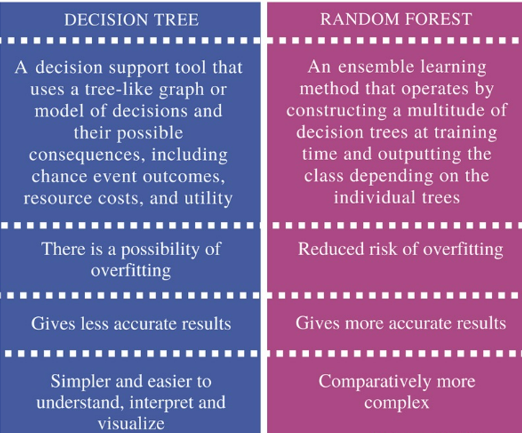